<a href="https://colab.research.google.com/github/PushprajMaraje/DeepLearningTests/blob/master/Nature_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

local_zip = 'Nature.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Nature')
zip_ref.close()

Nature image filename : /content/Nature/train/beach/beach.1.jpg


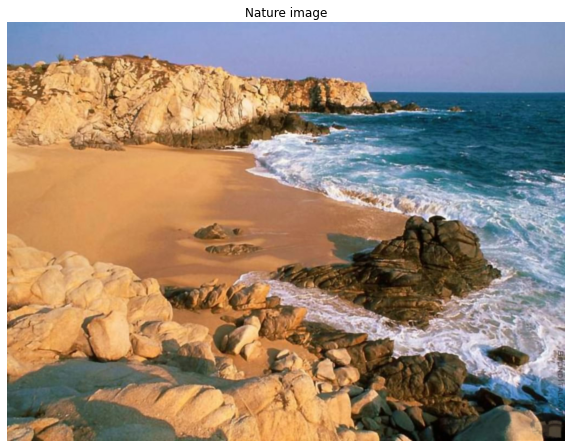

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
Nature_IMAGE_FN = '/content/Nature/train/beach/beach.1.jpg'
Nature_IMAGE_FN_temp = Nature_IMAGE_FN.strip().replace(" ", "_")

if Nature_IMAGE_FN != Nature_IMAGE_FN_temp:
  os.rename(Nature_IMAGE_FN, Nature_IMAGE_FN_temp)
  Nature_IMAGE_FN = Nature_IMAGE_FN_temp
  
print("Nature image filename :", Nature_IMAGE_FN)

fig = plt.figure(figsize=(10, 10))
img = plt.imread(Nature_IMAGE_FN)
plt.axis('off')
plt.title('Nature image')
plt.imshow(img)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

def Nature():
    train_data_dir = '/content/Nature/train/'
    validation_data_dir = '/content/Nature/valid/'

    model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(500,500, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
 
    tf.keras.layers.Dense(6, activation='softmax')
    ])
    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

    train_datagen = ImageDataGenerator(rescale=1/255)
    validation_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(500,500), 
        batch_size=20,
        class_mode='categorical')

    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir, 
        target_size=(500,500), 
        batch_size=5,
        class_mode='categorical')

    history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)
    model.save('model.h5')

In [ ]:
Nature()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 498, 498, 128)     3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 249, 249, 128)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 247, 247, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 121, 121, 64)      73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 58, 58, 32)       

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf 
model = tf.keras.models.load_model('G:\\natural\\model.h5')

path = 'G:\\natural\\ComputerDesktopWallpapersCollection498_056.jpg' 
img = image.load_img(path, target_size=(500,500))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

imagea = np.vstack([x])
classes = model.predict(imagea)
print(classes)